#Análisis Exploratorio de Datos

El Análisis Exploratorio de Datos (EDA por sus siglas en inglés, Exploratory Data Analysis) premite **explorar, describir y resumir** las principales características de un conjunto de datos, para lo cual se recurre frecuentemente a métodos visuales.

¿Cuál es el principal objetivo? Comprender los datos para extraer *insights*, pistas o conclusiones que guien los análisis posteriores que se realicen con estos datos, como por ejemplo aplicar pruebas de hipótesis o explorar modelos más complejos.

¿Por qué es importante? Este análisis nos permite, entre otras cosas:
* Comprender cómo se compone el set de datos y se distribuyen sus variables
* Identificar patrones y relaciones entre las variables
* Detectar valores nulos o faltantes
* Detectar duplicados
* Detectar outliers o atípicos

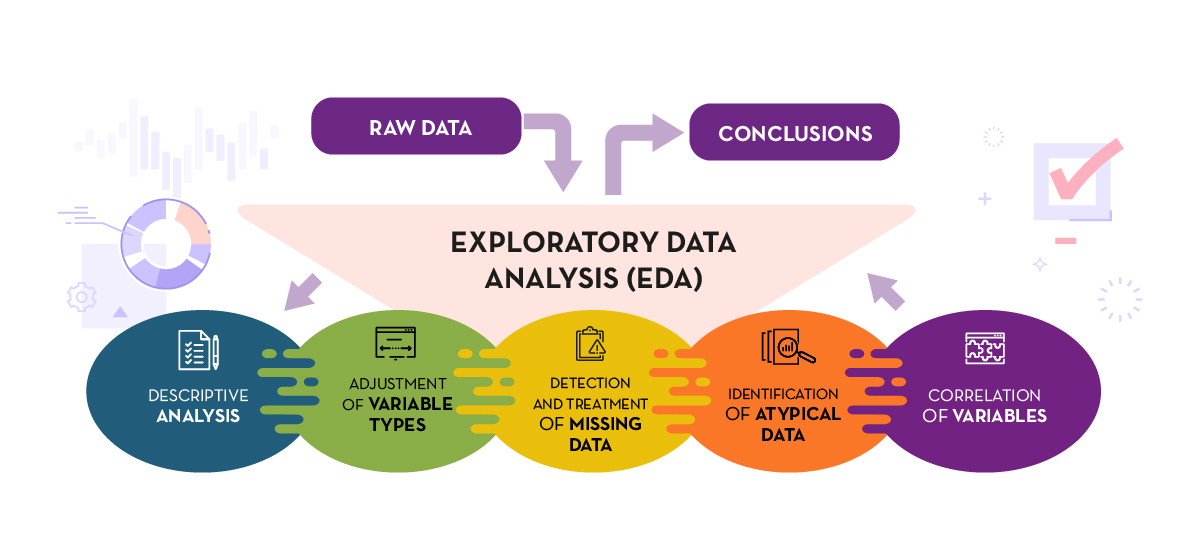

##Librerías

In [ ]:
#libreria para tratamiento de datos en formato de tabla (dataframe)
import pandas as pd

#librerias para visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

#librerias numéricas y estadísticas
import numpy as np
from scipy import stats



##Dataset

In [ ]:
#Carga del dataset disponible en la librería seaborn
titanic = sns.load_dataset('titanic')

#visualización del dataset en formato tabla
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


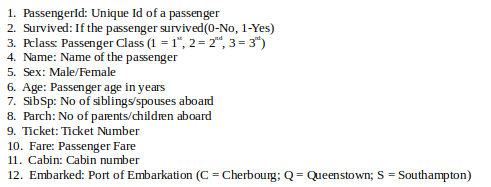

In [ ]:
type(titanic)

pandas.core.frame.DataFrame

In [ ]:
#Visualizar las primeras filas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic.select_dtypes(include=['category']).columns

Index(['class', 'deck'], dtype='object')

In [ ]:
titanic.select_dtypes(include=['number']).columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
titanic.age.mean()

29.69911764705882

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

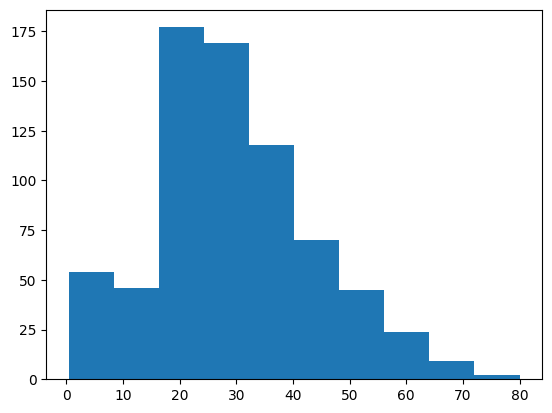

In [ ]:
plt.hist(titanic.age)

<Axes: xlabel='age', ylabel='Count'>

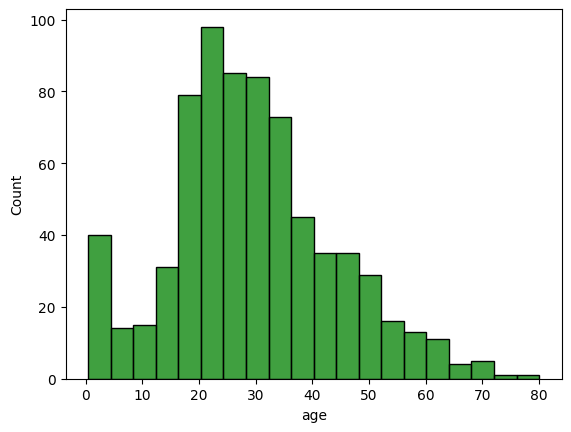

In [ ]:
sns.histplot(x='age', data=titanic, color='green')

<Axes: xlabel='age', ylabel='sex'>

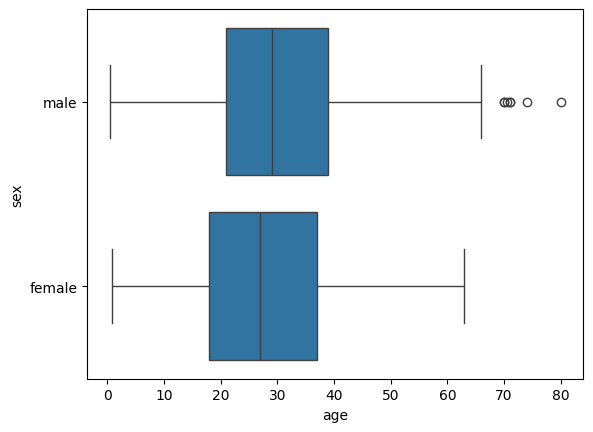

In [ ]:
sns.boxplot(x='age', y='sex', data=titanic)

<ipython-input-18-93215774f654>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='fare', data=titanic, palette='pastel')


<Axes: xlabel='class', ylabel='fare'>

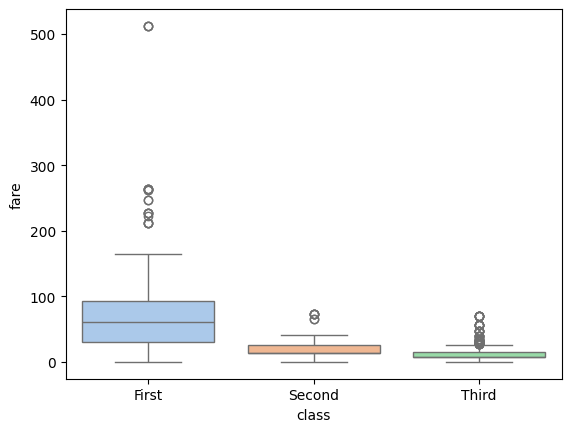

In [ ]:
sns.boxplot(x='class', y='fare', data=titanic, palette='pastel')

<Axes: xlabel='survived', ylabel='count'>

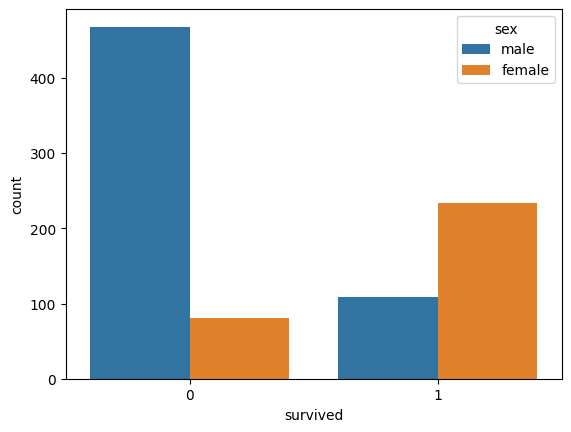

In [ ]:
sns.countplot(x='survived', hue='sex', data=titanic)

<Axes: xlabel='survived', ylabel='count'>

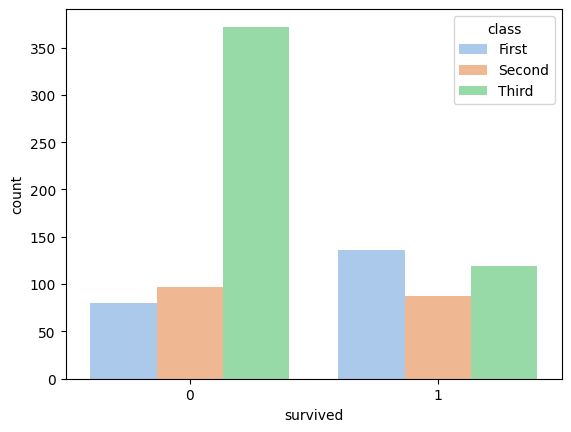

In [ ]:
sns.countplot(x ="survived", hue ="class", data = titanic, palette='pastel')

In [ ]:
titanic['class'].value_counts(dropna=False)

,count
class,
Third,491
First,216
Second,184


In [ ]:
titanic.survived.value_counts(dropna=False)

,count
survived,
0,549
1,342


In [ ]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


***EJERCICIO 5 TP2-MICHAUX JUAN MARTIN***

In [ ]:
# Importar las librerías necesarias
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Cargar el dataset
titanic = sns.load_dataset('titanic')
# Verificación de los datos
print("Primeras filas del dataset:")
print(titanic.head())

Primeras filas del dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# Estadísticas descriptivas de la variable 'age'
print("\nEstadísticas descriptivas de la variable 'age':")
print(titanic['age'].describe())


Estadísticas descriptivas de la variable 'age':
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


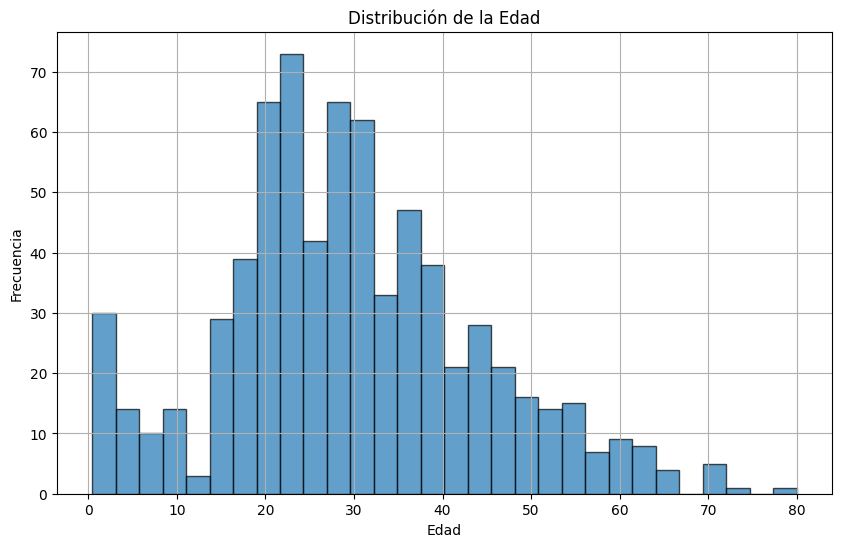

In [ ]:

# Histograma de la variable 'age'
plt.figure(figsize=(10, 6))
titanic['age'].dropna().hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

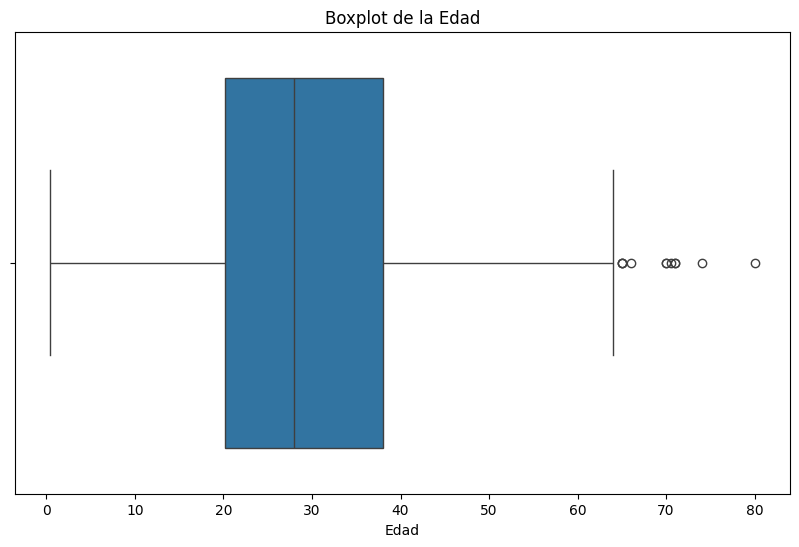

In [ ]:
# Boxplot de la variable 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic['age'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
# Normalización de la variable 'age'
scaler = MinMaxScaler()
age_column = titanic[['age']].fillna(0)  # Llena NaN con 0 para la normalización
titanic['age_normalized'] = scaler.fit_transform(age_column)  # Aplicar la transformación
# Verificación de la transformación
print("\nDatos de 'age' antes y después de la normalización:")
print(titanic[['age', 'age_normalized']].head())




Datos de 'age' antes y después de la normalización:
    age  age_normalized
0  22.0          0.2750
1  38.0          0.4750
2  26.0          0.3250
3  35.0          0.4375
4  35.0          0.4375


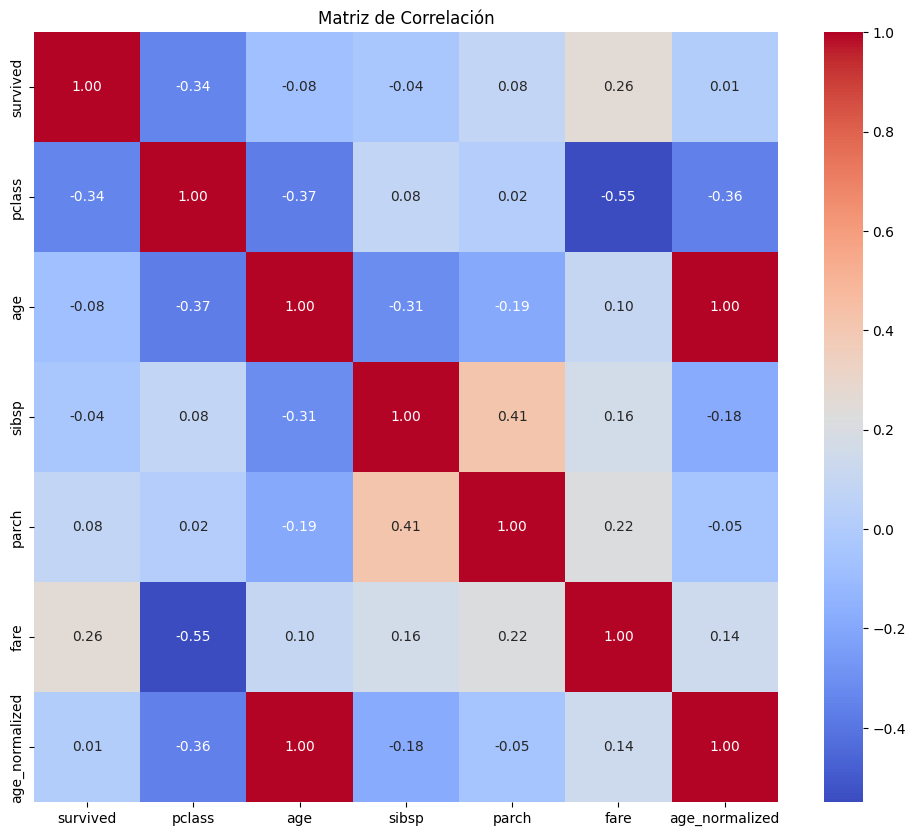

In [ ]:

# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_columns = titanic.select_dtypes(include=[np.number])

# Análisis de correlación
correlation_matrix = numeric_columns.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


# **ANALISIS-CONCLUSIONES:**


**TÉCNICAS APLICADAS:**  
1.  Estadísticas Descriptivas
2.  Visualización (Histograma y Boxplot)
1.  Normalización de la Variable 'age'




**Inicialmente, realicé un análisis de estadísticas descriptivas para comprender mejor la distribución de la variable 'age'. Esto me permitió observar métricas clave como la media, la desviación estándar, y los cuartiles. Luego, apliqué visualizaciones como el histograma y el boxplot para identificar la forma de la distribución y la presencia de valores atípicos. Finalmente, decidí normalizar la variable para facilitar comparaciones y análisis posteriores.**

***OBSERVACION DE LOS DATOS***




1.   **Estadísticas Descriptivas:**
La media de edad es de aproximadamente 29.7 años, con una desviación estándar de 14.5, lo que indica una variabilidad moderada en las edades.El 50% de las edades se encuentran entre los 20.1 y 38 años, con un rango de edades que va desde 0.42 hasta 80 años.
2.   **Distribución**:                                                         La distribución de la edad muestra una concentración de datos en el rango de 20 a 40 años, con una disminución hacia los extremos. La visualización del histograma y el boxplot confirmó la presencia de valores atípicos, principalmente en edades mayores.




**CONCLUSIÓN DEL ANÁLISIS**:




*  Impacto de la Normalización: La normalización permitió escalar la variable 'age' a un rango de [0, 1], eliminando la influencia de su rango original y facilitando su inclusión en análisis posteriores, como la matriz de correlación.

*  Matriz de Correlación: La incorporación de age_normalized en la matriz de correlación permitió observar cómo la edad se relaciona con otras variables numéricas, asegurando que su escala no distorsione los resultados.



**CONCLUSION FINAL**: El análisis descriptivo inicial y las visualizaciones me permitieron identificar características clave de la distribución de la edad y la necesidad de aplicar una normalización para mejorar la comparabilidad entre variables. Estas técnicas ayudaron a preparar los datos de manera más efectiva para análisis posteriores, como la correlación entre variables.